In [8]:
# ------ Imports & data ------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
df = pd.read_csv('data/raw/TMDB_movie_dataset_v11.csv')
# df = pd.read_csv('data/processed/100k_subset.csv')
# cols = []
df.dropna(subset=['revenue', 'budget'], inplace=True)
mask = (df['revenue'] == 0) & (df['budget'] == 0)
df = df.loc[~mask]
df = df.reset_index(drop=True)
print(df.size)

1890168


In [ ]:
# ------ Handling Outliers ------
df = df[(df['budget'] >= 1000) & (df['revenue'] >= 1000)].copy()
budget_cap = df['budget'].quantile(0.95)
revenue_cap = df['revenue'].quantile(0.95)
df = df[df['budget'] <= budget_cap]
df = df[df['revenue'] <= revenue_cap]

In [ ]:
# ------ Does Budget and Revenue correlate? ------
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,2.525000e+03,2525.000000,2525.000000,2.525000e+03,2525.000000,2.525000e+03,2525.000000
mean,1.964574e+05,6.566075,2745.473267,9.712903e+07,108.392475,3.479512e+07,31.986872
std,2.384874e+05,0.936524,3425.291654,1.273997e+08,19.876441,3.695591e+07,108.796692
min,5.000000e+00,0.000000,0.000000,1.000000e+03,1.000000,1.000000e+03,0.000000
25%,1.038900e+04,6.097000,538.000000,1.042185e+07,96.000000,8.000000e+06,13.254000
50%,5.910800e+04,6.602000,1520.000000,4.492230e+07,106.000000,2.050000e+07,19.338000
75%,3.659420e+05,7.139000,3558.000000,1.328207e+08,119.000000,5.000000e+07,30.112000
max,1.471387e+06,10.000000,27238.000000,6.534283e+08,330.000000,1.700000e+08,2994.357000


In [ ]:
# ------ Pearson Correlation Coefficient ------
print(df.corr(numeric_only=True))

                    id  vote_average  vote_count   revenue   runtime  \
id            1.000000      0.073273   -0.122505 -0.120146 -0.012674   
vote_average  0.073273      1.000000    0.364599  0.188182  0.290105   
vote_count   -0.122505      0.364599    1.000000  0.693613  0.251082   
revenue      -0.120146      0.188182    0.693613  1.000000  0.184448   
runtime      -0.012674      0.290105    0.251082  0.184448  1.000000   
adult         0.106430     -0.139582   -0.015957 -0.015172  0.221966   
budget       -0.065381      0.022478    0.438609  0.680093  0.223812   
popularity    0.181649      0.098949    0.062835  0.114937  0.054557   

                 adult    budget  popularity  
id            0.106430 -0.065381    0.181649  
vote_average -0.139582  0.022478    0.098949  
vote_count   -0.015957  0.438609    0.062835  
revenue      -0.015172  0.680093    0.114937  
runtime       0.221966  0.223812    0.054557  
adult         1.000000 -0.018734   -0.005853  
budget       -0.018734

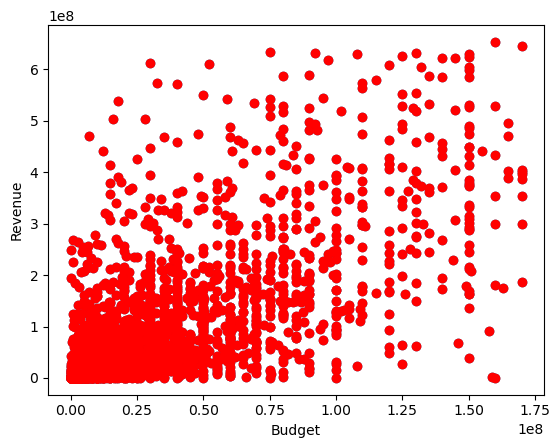

In [ ]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.plot(df['budget'], df['revenue'], "ro")

## Interpretation: "Pearson Correlation Coefficient"
The correlation matrix shows, that there is a strong relationship
between budget and revenue. This suggests, that higher budgeted productions
generate more revenue at the box offices.

(It is obvious, that the quality of the data is lacking and therefor might
distort the values. There are data instances where production OR revenue is 0.00)

Training Metrics:
MAE: 62168614.25
RMSE: 94939335.89
R-squared: 0.4628

Test Metrics:
MAE: 58479624.66
RMSE: 87077846.15
R-squared: 0.4581


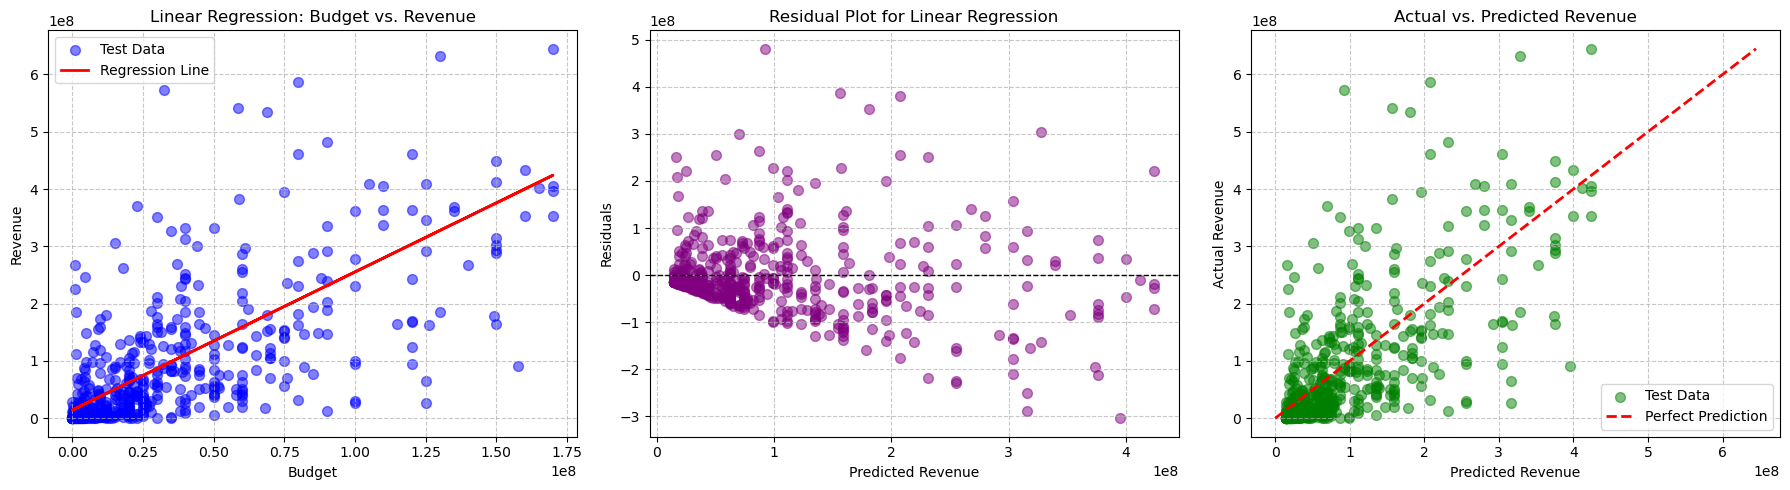

In [ ]:
# ------ Linear Regression ------

X = df[["budget"]]
y = df["revenue"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(y_train_pred)

# Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Metrics:")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R-squared: {train_r2:.4f}")
print("\nTest Metrics:")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R-squared: {test_r2:.4f}")
import matplotlib.pyplot as plt

# Setting up 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residuals aka Error
residuals = y_test - y_test_pred

x_label = 'Budget'
y_label = 'Revenue'

# Plot 1: Scatter with Regression Line
axes[0].scatter(X_test, y_test, color='blue', alpha=0.5, s=50, label='Test Data')
axes[0].plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression Line')
axes[0].set_xlabel(x_label)
axes[0].set_ylabel(y_label)
axes[0].set_title('Linear Regression: Budget vs. Revenue')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot 2: Residual Plot
axes[1].scatter(y_test_pred, residuals, color='purple', alpha=0.5, s=50)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_xlabel(f'Predicted {y_label}')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot for Linear Regression')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Plot 3: Actual vs. Predicted
axes[2].scatter(y_test_pred, y_test, color='green', alpha=0.5, s=50, label='Test Data')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
axes[2].set_xlabel(f'Predicted {y_label}')
axes[2].set_ylabel(f'Actual {y_label}')
axes[2].set_title('Actual vs. Predicted Revenue')
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Interpretation: Linear Regression Model: x=Budget y=Revenue
Even though there is a strong correlation coefficient between *budget* and *revenue*, a linear regression model is not sufficient to capture the overall relationship. The R-squared value indicates that the budget explains only a small fraction of the variance in revenue.

**Outliers**: Previously, movies with very high revenues or budgets were significantly impacting the regression analysis. After implementing outlier handling by filtering and capping the data, the model's performance has improved, and the plots are now more interpretable. This allows for a more accurate assessment of the relationship between budget and revenue for the majority of films.

Further exploration could be:
- [ ] Fitting polynomial functions onto the data to capture non-linear relationships.
- [ ] Incorporating other features to build a more comprehensive predictive model.